In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from lib.c_index import c_index
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [10]:
path = "dataset/Breast Cancer METABRIC.csv"
df = pd.read_csv(path)
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [12]:
print(df.shape)
print(df.columns)
print(df.info())

(2509, 34)
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column    

In [18]:
df.describe(include=['object', 'bool'])

,Patient ID,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,HER2 status measured by SNP6,...,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status,Sex,3-Gene classifier subtype,Patient's Vital Status
count,2509,1955,2509,2509,1917,1980,1980,2426,2469,1980,...,1980,1870,2509,1981,1980,1980,2488,2509,1764,1980
unique,2509,2,2,8,3,2,7,2,2,4,...,11,2,8,2,2,2,2,1,4,3
top,MB-0000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,Positve,Positive,Neutral,...,8,Left,IDC,Deceased,Positive,Yes,Not Recurred,Female,ER+/HER2- Low Prolif,Living
freq,1,1170,2506,1865,965,1568,700,1817,1825,1436,...,299,973,1865,1144,1040,1173,1486,2509,640,837


In [44]:
patient_meta_cols = ["Patient ID", "Oncotree Code", "Cohort"]
demographic_cols = ['Age at Diagnosis', 'Sex', 'Inferred Menopausal State']
cancer_characteristics_cols = ["Cancer Type", "Cancer Type Detailed", "Cellularity", "Neoplasm Histologic Grade", "Tumor Other Histologic Subtype", "Tumor Size", "Tumor Stage", "Primary Tumor Laterality"]
biomarker_cols = ["ER Status", "ER status measured by IHC", "PR Status", "HER2 Status", "HER2 status measured by SNP6", "Pam50 + Claudin-low subtype", "3-Gene classifier subtype", "Integrative Cluster"]
treatment_cols = ["Type of Breast Surgery", "Hormone Therapy", "Chemotherapy", "Radiation Therapy"]
clinical_outcome_cols = ["Overall Survival (months)", "Overall Survival Status", "Patient's Vital Status", "Relapse Free Status (Months)", "Relapse Free Status"]
clinical_metrics_cols = ["Lymph nodes examined positive", "Mutation Count", "Nottingham prognostic index"]

## Demographic plot

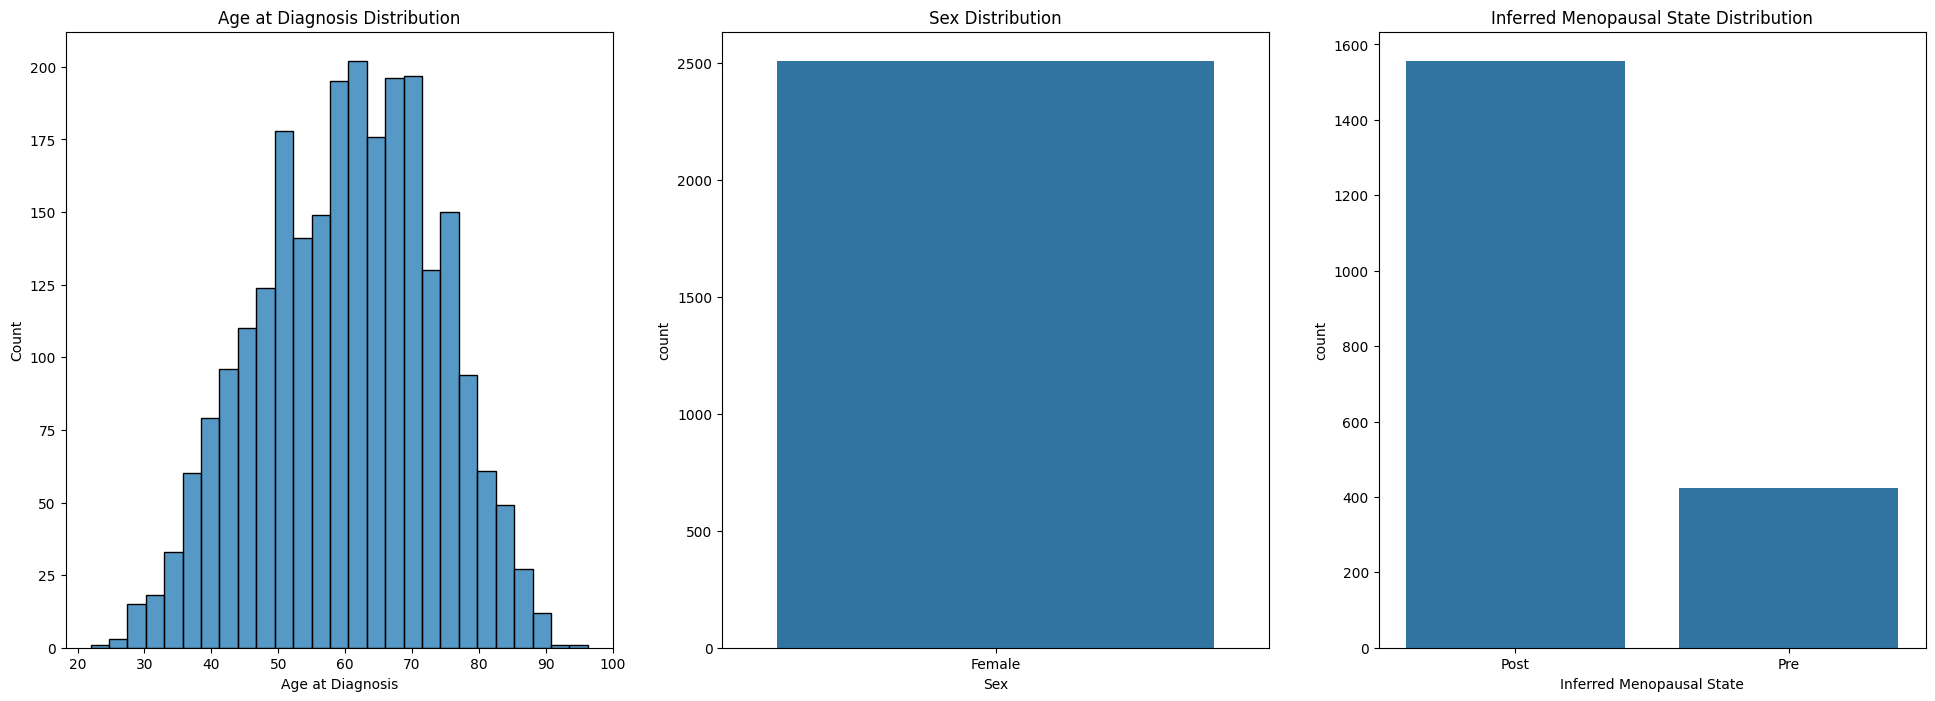

In [ ]:
fig, axes = plt.subplots(figsize=(24, 8), ncols=3, nrows=1)
sns.histplot(data=df, x="Age at Diagnosis", ax=axes[0])
sns.countplot(data=df, x="Sex", ax=axes[1])
sns.countplot(data=df, x="Inferred Menopausal State", ax=axes[2])

axes[0].set_title("Age at Diagnosis Distribution")
axes[1].set_title("Sex Distribution")
axes[2].set_title("Inferred Menopausal State Distribution")

plt.show()

## Treatment plot

In [60]:
df["Type of Breast Surgery"]

0              Mastectomy
1       Breast Conserving
2              Mastectomy
3              Mastectomy
4              Mastectomy
              ...        
2504                  NaN
2505                  NaN
2506                  NaN
2507                  NaN
2508                  NaN
Name: Type of Breast Surgery, Length: 2509, dtype: object

Text(0.5, 1.0, 'Type of Breast Surgery Distribution')

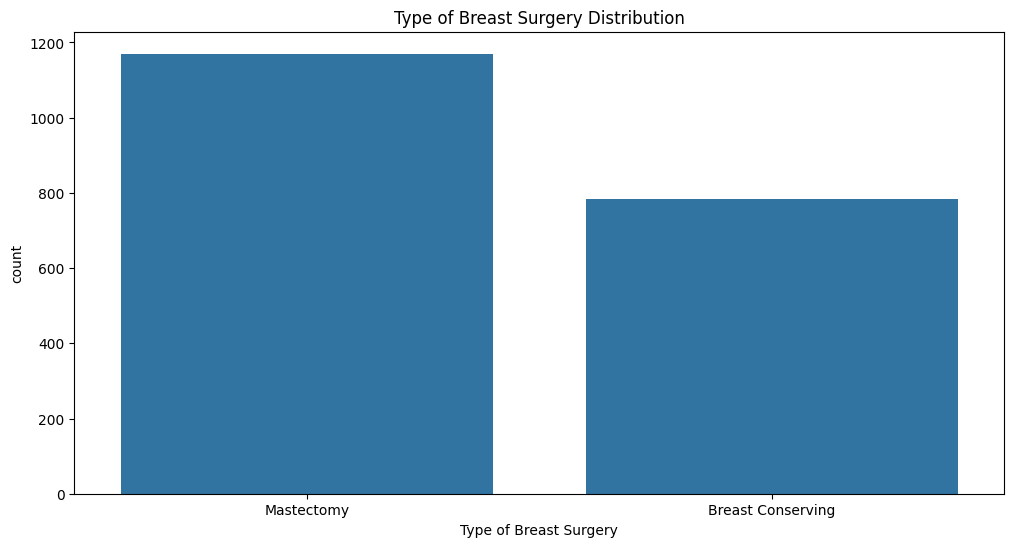

In [62]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Type of Breast Surgery")

plt.title("Type of Breast Surgery Distribution")